In [91]:
import classy as Class
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
from astropy.cosmology import Planck15 as cosmo
from IPython.display import display, clear_output

######################################################
#  Setting fiducial parameters
#  Planck18 TT,TE,EE+lowE+lensing+BAO
######################################################

ln10e10As = 3.047
As = np.exp(ln10e10As)/(10**10)

standard_params = {
    "omega_b": 0.02242,
    "omega_cdm": 0.11933,
    "n_s": 0.9665,
    "tau_reio": 0.0561,
    "sigma8": 0.8102,
    "H0": 67.66
    #"A_s": As
}

######################################################
#  Setting up plots
######################################################

%config InlineBackend.figure_format = 'retina'
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

######################################################
#  Configuring the run
######################################################

N = 1              #Number of basis functions in each test
zmin_pert = 300    #min and max redshift of perturbations
zmax_pert = 2500
ll_max = 2500
linear_sampling = 2*20000  #number of timesteps during recombination

amplitudes = np.linspace(-.1, .1, 5)
middle = int((amplitudes.shape[0]-1)/2)

Npert = 80
z_of_pert = np.linspace(zmin_pert, zmax_pert, Npert)
dz = (zmax_pert - zmin_pert)/Npert
width=dz/2.355/3.  #dz is 1/3 the FWHM
width=100

plancklike=True

common_settings = {'output' : 'tCl,pCl,lCl',
                   # LambdaCDM parameters
                   'H0':standard_params["H0"],
                   'omega_b':standard_params["omega_b"],
                   'omega_cdm':standard_params["omega_cdm"],
                   'sigma8': standard_params["sigma8"],
                   'n_s':standard_params["n_s"],
                   'tau_reio': standard_params["tau_reio"],
                   'thermodynamics_verbose': 0,
                   'input_verbose': 0,
                   'lensing': 'yes',
                   #'recombination': 'RECFAST',
                   'perturb_xe': 'no',
                   'thermo_Nz_lin': linear_sampling
                  }

M = Class.Class()
M.set(common_settings)

True

In [92]:
M.compute()

dict_keys(['z', 'conf. time [Mpc]', 'x_e', 'x_fid', 'xe_pert', "kappa' [Mpc^-1]", 'exp(-kappa)', 'g [Mpc^-1]', 'Tb [K]', 'dTb [K]', 'w_b', 'c_b^2', 'tau_d'])


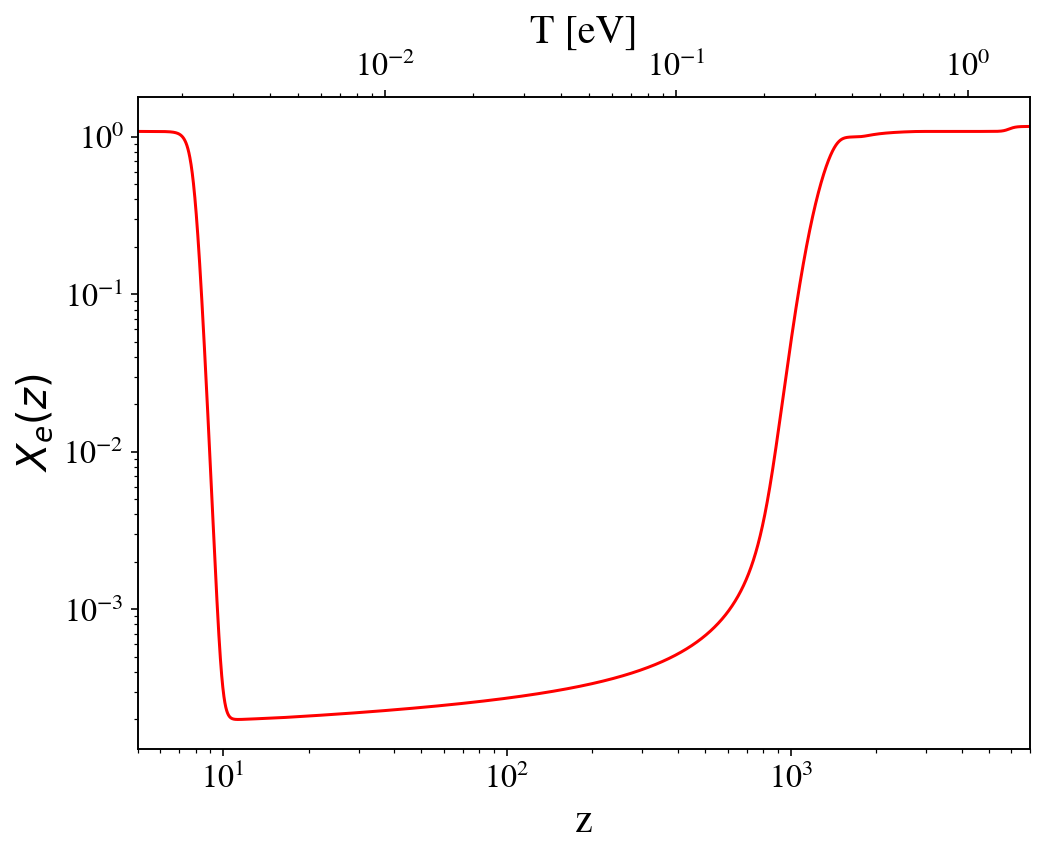

In [94]:
thermo = M.get_thermodynamics()
fig,ax = plt.subplots()

zmin = 5
zmax = 7e3
fsize = 20


kb_eV = 8.617e-5

Tmin = 2.726*(1+zmin)*kb_eV
Tmax = 2.726*(1+zmax)*kb_eV


ax.plot(thermo['z'], thermo['x_fid'], color='red')
ax.set_xlim([zmin, zmax])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('z', fontsize=fsize)
ax.set_ylabel('$X_e(z)$', fontsize=fsize)

ax2 = ax.twiny()  # instantiate a second axes that shares the same x-axis

ax2.set_xlabel('T [eV]', fontsize=fsize)
ax2.set_xlim([Tmin, Tmax])
ax2.set_xscale('log')

plt.savefig("../results/standard_rec.png",dpi=300, bbox_inches='tight')
print(thermo.keys())

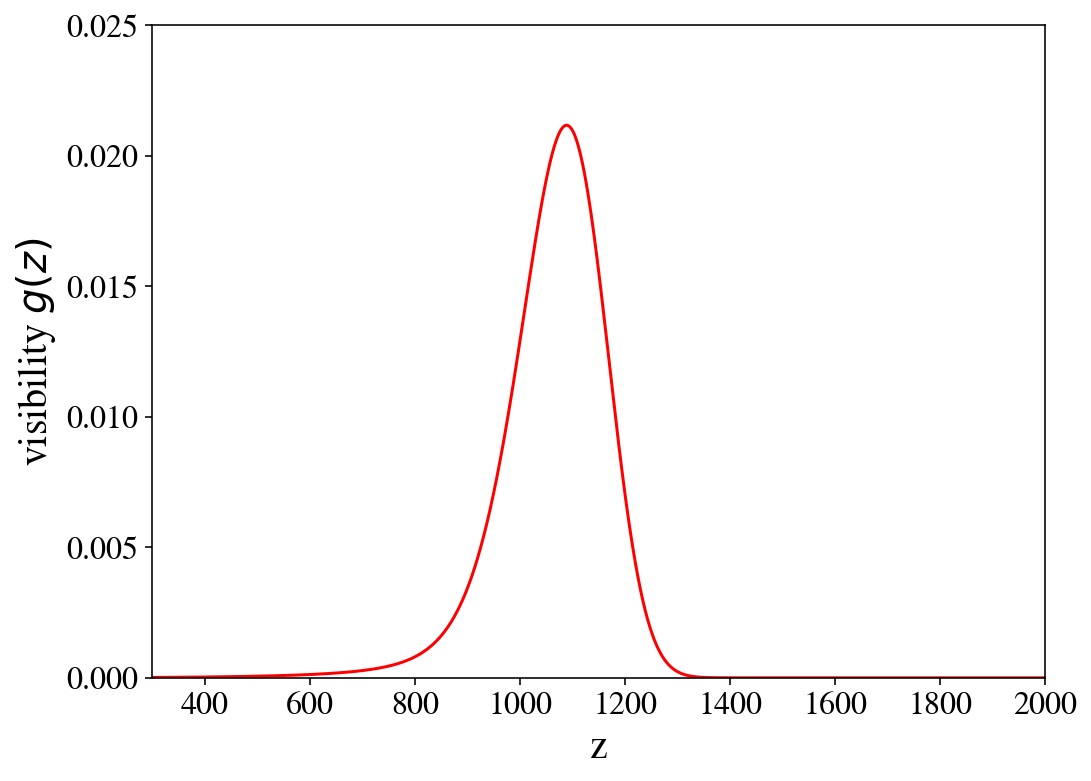

In [100]:
fig,ax=plt.subplots()

zmin = 300
zmax = 2e3
fsize = 20


kb_eV = 8.617e-5

Tmin = 2.726*(1+zmin)*kb_eV
Tmax = 2.726*(1+zmax)*kb_eV

ax.plot(thermo['z'], thermo["kappa' [Mpc^-1]"]*thermo["exp(-kappa)"], color='red')

ax.set_xlim([zmin, zmax])

ax.set_ylim([0, .025])

ax.set_xlabel('z', fontsize=fsize)
ax.set_ylabel('visibility $g(z)$', fontsize=fsize)

plt.savefig("../results/vis_function.png",dpi=300, bbox_inches='tight')

plt.show()